In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Data source
https://data.cityofchicago.org/

Applied filter when downloading datasets from Chicago Open Data Portal:
service request completion date between 1/1/2016 - 12/31/2016

# Problem 1.1: Download and Merge Data

In [2]:
graffiti = pd.read_csv('311_Service_Requests_-_Graffiti_Removal.csv', index_col = 'Service Request Number')
graffiti.columns = [x.lower() for x in graffiti.columns]
graffiti.columns

Index(['creation date', 'status', 'completion date', 'type of service request',
       'what type of surface is the graffiti on?',
       'where is the graffiti located?', 'street address', 'zip code',
       'x coordinate', 'y coordinate', 'ward', 'police district',
       'community area', 'ssa', 'latitude', 'longitude', 'location'],
      dtype='object')

In [3]:
headers = ['creation_date', 'status', 'completion_date', 'type', 'address', 'zip', 'ward', 'police_district', 'community_area', 'lat', 'lon']
graffiti_sub = graffiti[['creation date', 'status', 'completion date', 'type of service request', 'street address', 'zip code', 'ward', 'police district', 'community area', 'latitude', 'longitude']]
graffiti_sub.columns = headers
graffiti_sub['file'] = 'graffiti'

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
buildings = pd.read_csv('311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported.csv', index_col = 'SERVICE REQUEST NUMBER')
buildings.columns = [x.lower() for x in buildings.columns]
buildings.columns
# Note that buildings data does not include completion date or status, so we 
# are unable to track whether a the service request was completed

Index(['service request type', 'date service request was received',
       'location of building on the lot (if garage, change type code to bgd).',
       'is the building dangerous or hazardous?',
       'is building open or boarded?',
       'if the building is open, where is the entry point?',
       'is the building currently vacant or occupied?',
       'is the building vacant due to fire?',
       'any people using property? (homeless, childen, gangs)',
       'address street number', 'address street direction',
       'address street name', 'address street suffix', 'zip code',
       'x coordinate', 'y coordinate', 'ward', 'police district',
       'community area', 'latitude', 'longitude', 'location'],
      dtype='object')

In [5]:
buildings_headers = ['creation_date', 'type', 'address', 'zip', 'ward', 'police_district', 'community_area', 'lat', 'lon']
buildings['full address'] = buildings['address street number'].map(str) + buildings['address street direction'] + buildings['address street name'] + buildings['address street suffix']
buildings_sub = buildings[['date service request was received', 'service request type', 'full address', 'zip code', 'ward', 'police district', 'community area', 'latitude', 'longitude']]
buildings_sub.columns = buildings_headers
buildings_sub['file'] = 'buildings'

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
potholes = pd.read_csv('311_Service_Requests_-_Pot_Holes_Reported.csv', index_col = 'SERVICE REQUEST NUMBER')
potholes.columns = [x.lower() for x in potholes.columns]
potholes.columns

Index(['creation date', 'status', 'completion date', 'type of service request',
       'current activity', 'most recent action',
       'number of potholes filled on block', 'street address', 'zip',
       'x coordinate', 'y coordinate', 'ward', 'police district',
       'community area', 'ssa', 'latitude', 'longitude', 'location'],
      dtype='object')

In [7]:
potholes_sub = potholes[['creation date', 'status', 'completion date', 'type of service request', 'street address', 'zip', 'ward', 'police district', 'community area', 'latitude', 'longitude']]
potholes_sub.columns = headers
potholes_sub['file'] = 'potholes'

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [8]:
sanitation = pd.read_csv('311_Service_Requests_-_Sanitation_Code_Complaints.csv', index_col = 'Service Request Number')
sanitation.columns = [x.lower() for x in sanitation.columns]
sanitation.columns

Index(['creation date', 'status', 'completion date', 'type of service request',
       'what is the nature of this code violation?', 'street address',
       'zip code', 'x coordinate', 'y coordinate', 'ward', 'police district',
       'community area', 'latitude', 'longitude', 'location'],
      dtype='object')

In [9]:
sanitation_sub = sanitation[['creation date', 'status', 'completion date', 'type of service request', 'street address', 'zip code', 'ward', 'police district', 'community area', 'latitude', 'longitude']]
sanitation_sub.columns = headers
sanitation_sub['file'] = 'sanitation'

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [10]:
df = pd.concat([graffiti_sub, buildings_sub, potholes_sub, sanitation_sub])
df.columns

Index(['address', 'community_area', 'completion_date', 'creation_date', 'file',
       'lat', 'lon', 'police_district', 'status', 'type', 'ward', 'zip'],
      dtype='object')

# Problem 1.2: Summary statistics

In [11]:
df.columns

Index(['address', 'community_area', 'completion_date', 'creation_date', 'file',
       'lat', 'lon', 'police_district', 'status', 'type', 'ward', 'zip'],
      dtype='object')

In [12]:
# disregard duplicate requests
df = df.loc[(df['status'] != 'Open - Dup') & (df['status'] != 'Completed - Dup')]
df['status'].unique()

array(['Completed', nan, 'Open'], dtype=object)

In [13]:
# count by overall category
category = df['file'].value_counts()
category

graffiti      116193
potholes       37985
sanitation     20181
buildings       4472
Name: file, dtype: int64

In [14]:
# count by category and month
df['creation_month'] = df['creation_date'].str.extract('(\d\d)')
df['completion_month'] = df['completion_date'].str.extract('(\d\d)')

month_category = df.groupby(['file', 'creation_month']).size()
month_category = month_category.to_frame()
month_category.reset_index(inplace = True)
month_category.columns = ['file', 'creation_month', 'count']

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


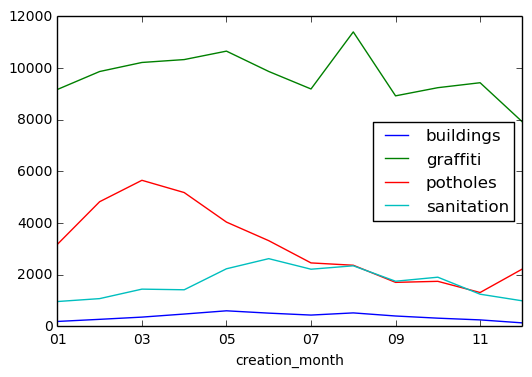

In [15]:
# plot of county by category by month
# source: http://stackoverflow.com/questions/29233283/plotting-multiple-lines-with-pandas-dataframe

fig, ax = plt.subplots()
labels = []
for key, group in month_category.groupby(['file']):
    ax = group.plot(ax = ax, kind = 'line', x = 'creation_month', y = 'count')
    labels.append(key)
ax.legend(labels, loc='best')
plt.show()

In [16]:
# graffiti subcateogries
graffiti_subcat = graffiti['where is the graffiti located?'].value_counts()
graffiti_subcat

Front                  38212
Side                   16898
Pole                   11358
Garage                  9893
Rear                    8337
Traffic Control Box     5407
Alley                   5330
Door                    4377
Sign                    4358
Dumpster                3805
Fence                   3310
Viaduct                 2296
Garbage Cart            1993
Mail Box                1417
Newspaper Box           1379
Bench                    790
Express Way Job          536
Overpass                 284
Hydrant                   76
Phone                     71
Name: where is the graffiti located?, dtype: int64

In [17]:
# buildings subcategories
# No approrpiate subcategorizations of buildings 311 data

In [18]:
# potholes subcategories
potholes_subcat = potholes['most recent action'].value_counts()
potholes_subcat

Pothole Patched                                                        31125
No Potholes Found                                                       3530
Completed Upon Arrival                                                  1479
Street Resurfaced                                                        652
CDOT Pavement Cave-In Survey Transfer Outcome                            317
WM Sewer Cave In Inspection Transfer Outcome                             264
CDOT Alley Pot Hole Transfer Outcome                                     214
CDOT Inspect Public Way Survey Transfer Outcome                          120
No Action - See Remarks in Description                                   114
No Such Address Found                                                     43
Not Within CDOT Jurisdiction                                              41
Follow-on Pot Hole in Street Created                                      34
CDOT Pavement Buckle or Speed Hump Transfer Outcome                       18

In [19]:
# sanitation subcategories
sanitation_subcat = sanitation['what is the nature of this code violation?'].value_counts()
sanitation_subcat

Other                                  8327
Garbage in yard                        3812
Garbage in alley                       2995
Overflowing carts                      1627
Dumpster not being emptied             1574
Dog feces in yard                      1150
Construction Site Cleanliness/Fence     859
Standing water                          299
Graffiti Commercial Vehicle              26
Name: what is the nature of this code violation?, dtype: int64

In [20]:
# count by community area
community_area = df['community_area'].value_counts()
community_area.head(10)

24.0    11126
22.0     9434
58.0     6718
21.0     6042
31.0     5722
6.0      5585
30.0     5523
16.0     5254
63.0     5141
19.0     4895
Name: community_area, dtype: int64

In [21]:
# count by ward
ward = df['ward'].value_counts()
ward.head(10)

14.0    9943
1.0     9224
12.0    8327
33.0    7393
23.0    6973
47.0    6922
25.0    6478
35.0    6207
32.0    5639
27.0    4402
Name: ward, dtype: int64

In [22]:
# response time by category
# source: http://stackoverflow.com/questions/25646200/python-convert-timedelta-to-int-in-a-dataframe

import numpy as np
df['completion_date'] = pd.to_datetime(df['completion_date'], format='%m/%d/%Y')
df['creation_date'] = pd.to_datetime(df['creation_date'], format='%m/%d/%Y')
df['response_time'] = df['completion_date'] - df['creation_date']
df['response_time'] = (df['response_time'] / np.timedelta64(1, 'D')).astype(float)
response_time = df['response_time'].groupby(df['file']).mean()
response_time

file
buildings           NaN
graffiti       0.596335
potholes      21.575348
sanitation     9.411080
Name: response_time, dtype: float64

# Problem 1.3: Interesting Observations

The highest number of service requests occur during the spring and summer months.

Graffiti completion times are surprisingly high; 0.6 days on average.

# Problem 2: Data Augmentation and APIs
As noted in the assignment, only doing this analysis on the buildings and sanitation datasets for the entire year.

In [25]:
# get fips code for each buildings report
# note: this takes a few minutes to run due to api requests
import requests

fips_codes = []
for i, row in buildings.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    url = 'https://www.broadbandmap.gov/broadbandmap/census/block?latitude={}&longitude={}&format=json'.format(lat, lon)
    r = requests.get(url)
    if r:
        fips = dict(r.json())
        code = fips['Results']['block'][0]['FIPS']
        fips_codes.append(code)
    else:
        fips_codes.append(None)
buildings['fips_codes'] = fips_codes
buildings[:10]

,service request type,date service request was received,"location of building on the lot (if garage, change type code to bgd).",is the building dangerous or hazardous?,is building open or boarded?,"if the building is open, where is the entry point?",is the building currently vacant or occupied?,is the building vacant due to fire?,"any people using property? (homeless, childen, gangs)",address street number,...,x coordinate,y coordinate,ward,police district,community area,latitude,longitude,location,full address,fips_codes
SERVICE REQUEST NUMBER,,,,,,,,,,,,,,,,,,,,,
16-00017936,Vacant/Abandoned Building,01/02/2016,Front,NaN,Open,FRONT-SIDE AND REAR,Vacant,False,True,5930,...,1.170327e+06,1.865488e+06,16.0,7.0,68.0,41.786386,-87.651033,"(41.78638640364335, -87.65103294840148)",5930SCARPENTERST,170316806001002
16-00027497,Vacant/Abandoned Building,01/03/2016,Front,NaN,Open,NaN,Vacant,False,False,3559,...,1.153522e+06,1.862608e+06,23.0,8.0,66.0,41.778832,-87.712726,"(41.778832091928, -87.7127256067861)",3559W63RDST,170316604003014
16-00035418,Vacant/Abandoned Building,01/03/2016,Front,NaN,Open,"CALLER DOESN'T KNOW THE EXACT ADDRESS, CALLER ...",Vacant,False,False,5900,...,1.167017e+06,1.865600e+06,16.0,7.0,67.0,41.786764,-87.663167,"(41.786764299374006, -87.66316688619024)",5900SJUSTINEST,170316702001038
16-00031311,Vacant/Abandoned Building,01/03/2016,Front,NaN,Open,FRONT ENTRY,Vacant,False,False,8356,...,1.173188e+06,1.849430e+06,21.0,6.0,71.0,41.742258,-87.641018,"(41.74225776568885, -87.64101798247111)",8356SKERFOOTAVE,170317109002012
16-00035051,Vacant/Abandoned Building,01/03/2016,Rear,NaN,Open,REAR,Vacant,False,False,8112,...,1.170063e+06,1.851007e+06,21.0,6.0,71.0,41.746654,-87.652421,"(41.74665406968148, -87.65242142853317)",8112SMAYST,170317108006008
16-00056596,Vacant/Abandoned Building,01/04/2016,Front,NaN,Open,NaN,Vacant,False,False,402,...,1.179990e+06,1.864655e+06,20.0,3.0,42.0,41.783886,-87.615632,"(41.78388564277491, -87.61563244911125)",402E61STST,170314206001012
16-00054380,Vacant/Abandoned Building,01/04/2016,Front,NaN,Open,NaN,Vacant,False,True,12435,...,1.173579e+06,1.822404e+06,34.0,5.0,53.0,41.668086,-87.640383,"(41.66808588888048, -87.64038251498134)",12435SEMERALDAVE,170315305032033
16-00062202,Vacant/Abandoned Building,01/04/2016,Front,NaN,Open,FRONT DOOR OPEN,Vacant,False,False,1626,...,1.133057e+06,1.910124e+06,29.0,25.0,25.0,41.909606,-87.786648,"(41.9096055811526, -87.78664751486437)",1626NNAGLEAVE,170312505002028
16-00052007,Vacant/Abandoned Building,01/04/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11742,...,1.176719e+06,1.827073e+06,34.0,5.0,53.0,41.680829,-87.628750,"(41.6808288273904, -87.62875014237845)",11742SYALEAVE,170315302005051


In [26]:
# get fips code for each sanitation complaint
# note: this takes a few minutes to run due to api requests

fips_codes = []
for i, row in sanitation.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    url = 'https://www.broadbandmap.gov/broadbandmap/census/block?latitude={}&longitude={}&format=json'.format(lat, lon)
    r = requests.get(url)
    if r:
        fips = dict(r.json())
        code = fips['Results']['block'][0]['FIPS']
        fips_codes.append(code)
    else:
        fips_codes.append(None)
sanitation['fips_codes'] = fips_codes
sanitation[:10]

,creation date,status,completion date,type of service request,what is the nature of this code violation?,street address,zip code,x coordinate,y coordinate,ward,police district,community area,latitude,longitude,location,fips_codes
Service Request Number,,,,,,,,,,,,,,,,
16-00005911,01/01/2016,Completed,01/04/2016,Sanitation Code Violation,Dumpster not being emptied,18 N TALMAN AVE,60612.0,1.158853e+06,1.899917e+06,27,12,27,41.881106,-87.692162,"(41.88110597862378, -87.69216226978267)",170318374002000
16-00008105,01/01/2016,Completed,01/04/2016,Sanitation Code Violation,Garbage in yard,7938 S WABASH AVE,60619.0,1.178087e+06,1.852392e+06,6,6,44,41.750278,-87.622979,"(41.750278002798325, -87.62297857190532)",170314403005001
16-00008183,01/01/2016,Completed,01/04/2016,Sanitation Code Violation,Construction Site Cleanliness/Fence,442 W WACKER DR ER,60607.0,1.174083e+06,1.898170e+06,25,1,32,41.875985,-87.636291,"(41.87598480231486, -87.6362905484112)",170318391002037
16-00009911,01/01/2016,Completed,01/04/2016,Sanitation Code Violation,Dumpster not being emptied,2712 W ARTHUR AVE,60645.0,1.157018e+06,1.943020e+06,50,24,2,41.999420,-87.697727,"(41.999419638611165, -87.69772708238521)",170310206013000
16-00011795,01/01/2016,Completed,01/04/2016,Sanitation Code Violation,Dumpster not being emptied,3030 N HONORE ST,60657.0,1.163584e+06,1.920281e+06,32,19,5,41.936888,-87.674216,"(41.93688765836184, -87.67421593086208)",170310513001017
16-00005916,01/01/2016,Completed,01/05/2016,Sanitation Code Violation,Other,5258 S WHIPPLE ST,60632.0,1.156936e+06,1.869613e+06,14,9,63,41.797987,-87.700022,"(41.797987190613256, -87.70002151020466)",170316304004014
16-00008826,01/01/2016,Completed,01/05/2016,Sanitation Code Violation,Other,377 N NB OUTER LAKE SHORE DR,60601.0,1.180120e+06,1.902848e+06,42,18,8,41.888685,-87.613981,"(41.88868520186334, -87.61398112884407)",170310814031005
16-00005194,01/01/2016,Completed,01/06/2016,Sanitation Code Violation,Overflowing carts,12000 S PRINCETON AVE,60628.0,1.176442e+06,1.825356e+06,34,5,53,41.676124,-87.629816,"(41.67612352544859, -87.62981637199104)",170315305011031
16-00007120,01/01/2016,Completed,01/11/2016,Sanitation Code Violation,Dog feces in yard,8612 S KOSTNER AVE,60652.0,1.148594e+06,1.847073e+06,18,8,70,41.736297,-87.731193,"(41.73629660780156, -87.73119328676863)",170317003022016


get unique fips from above, break them into state(2), county(3), tract (6), block group(1)
run calls to census api based on these unique fips

key = '086d412671b3975c5fbfb74009c8700647de7745'
base = 'api.census.gov/data/2015/acs5?get=NAME,'
r1 = 'B02001_001E' # race total
r2 = 'B02001_002E' # white 
r3 = 'B02001_003E' # black or African American 
r4 = 'B02001_004E' # American Indian and Alaska Native
r5 = 'B02001_005E' # Asian
r6 = 'B02001_006E' # Native Hawaiian or other Pacific Islander
r7 = 'B02001_004E' # Other race
i = 'B06011_001E' # median income in the past 12 months, total
h = 'B25010_001E' # average household size, total